# Постановка задачи

 Используя схему бегущего счета и итерационные методы, решить задачу:

$$
 \begin{gathered}
\begin{cases}
\frac{\partial u}{\partial t} + \arctan{u}\frac{\partial u}{\partial x}=0, ~~ 0<x\leq1,\\ 
u(x,0)=\sin{\pi x}\\
u(0,t)=0
\end{cases}
\end{gathered}
$$

# Исследование задачи

## Характеристики



Для того, чтобы определить не претерпевает ли решение разрыв составим уравнения характеристик и посмотрим, будут ли они пересекаться. Для данной задачи уравнение характеристик будет иметь вид:

$$
\frac{dx}{\arctan{u}} = dt\\ 
$$

После интегрирования получаем:

$$
\frac{x-x_{0}}{\arctan{u}} = t-t_{0}
$$

c учетом граничных условий имеем два семейства характеристик:

$$
1) t_{0}=0 : \frac{x-x_{0}}{\arctan{\sin{\pi x}}} = t\\
$$

$$
2) x_{0}=0 : \frac{x}{\arctan{0}} + t_{0} = t\\
$$

Построим их графики.

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import animation
import plotly
import plotly.graph_objs as go
import warnings

from IPython.display import clear_output, HTML, display

In [3]:
def C(u):
    return np.arctan(u) 

def C_integral(u):
    return np.arctan(2*u + np.sin(u) + 1)

def condition_initial(x):
    return np.sin(np.pi*x)

def condition_border(t):
    return 0

In [4]:
def characteristics( x, x0=0, t0=0, first=True):
        if first:
            t0 = 0
            return 1/C(condition_initial(x0))*(x - x0)
        if not first:
            x0 = 0
           # print(C(condition_border(t0)))
            return 1/C(condition_border(t0))*x + t0
            
    
def plot_characteristics(x_start, x_end, t_start, t_end, how_many):
        x = np.linspace(x_start, x_end, 100)
        f, axs = plt.subplots(2,2,figsize=(9,9))
        #f.suptitle('Characteristics plot')
        plt.subplot(1, 1, 1)
        plt.xlim(x_start, x_end)
        plt.ylim(t_start, t_end)
        plt.title('Characteristics')
        plt.xlabel('x')
        plt.ylabel('t')
        x_for_char = np.linspace(x_start, x_end, how_many)
        t_for_char = np.linspace(t_start, t_end, how_many)
        for x0 in x_for_char:
            plt.plot(x, characteristics(x, x0 = x0),color="blue")
        for t0 in t_for_char:
            plt.plot(x, characteristics(x, t0 = t0, first = False),color="red")
            

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in multiply

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

invalid value encountered in multiply



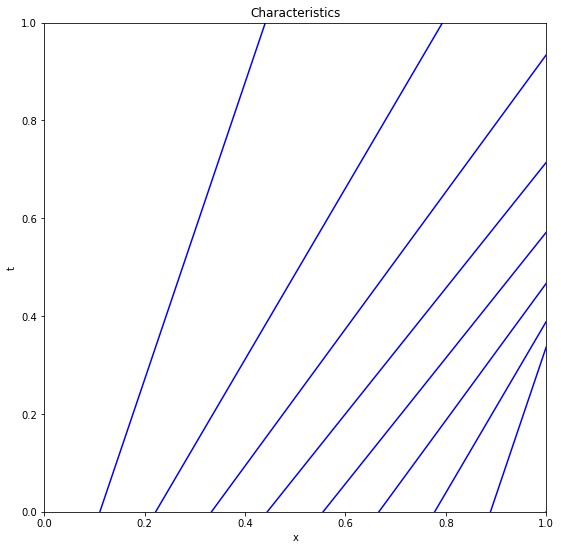

In [5]:
plot_characteristics(0, 1, 0, 1, 10)

при $$-\frac{\pi}{2}<\arctan{0}\leq \frac{\pi}{2} ~~~ (\arctan(0)=0)$$
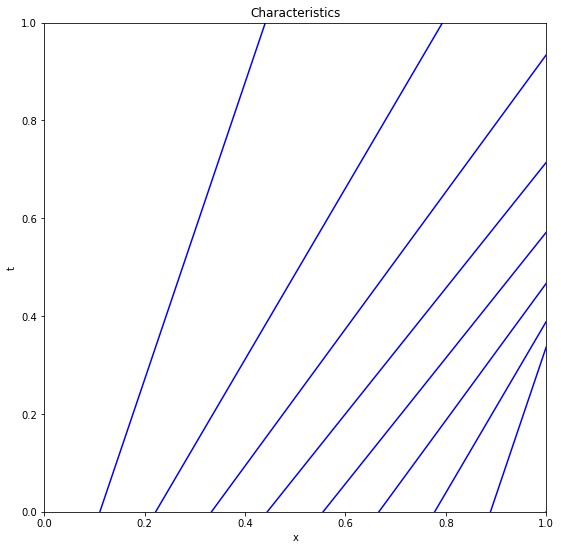

при $$\frac{\pi}{2}<\arctan{0}\leq \frac{3\pi}{2} ~~~ (\arctan(0)=\pi)$$
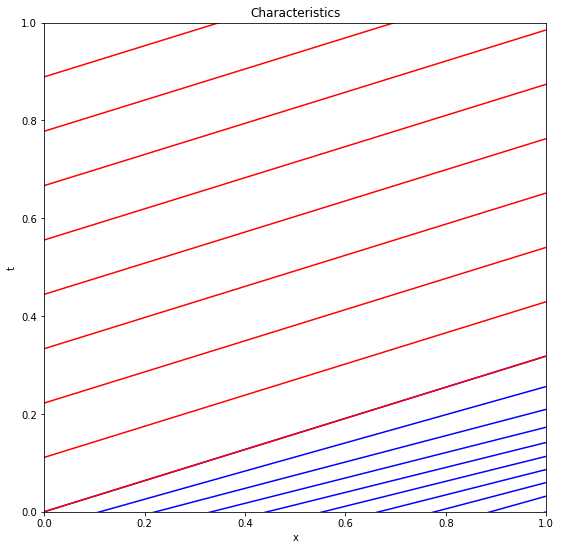

Как видно, характеристики не пересекаются на интервале (0,1]. Следовательно, нет так называемого опрокидывания волны, и во всей области решение будет представимо через разностную схему.

## Проверка сходимости по спектральному критерию Неймана

In [42]:
epsilon = 0.00001
N = 100; M = 100 
T_begin = 0; T_end = 1 
X_begin = 0; X_end = 1
h = (X_end - X_begin)/(N-1)
tau = (T_end - T_begin)/(M-1)

In [43]:

y = np.ones((M,N)) 

for n in np.arange(N):
        y[0][n] = np.sin(h*n*np.pi)

for m in np.arange(M):
        y[m][0] = 0
        
        
def f(x):
    return x * np.arctan(x) - np.log(np.sqrt(1 + x * x))
        
def F(mp1, np1):
    n = np1-1
    m = mp1-1
    return (y[mp1][n]-y[m][n]+y[mp1][np1]-y[m][np1])/(2.*tau) + (f(y[mp1][np1])-f(y[mp1][n])+f(y[m][np1])-f(y[m][n]))/(2.*h)

def dF(m, n):
    return 1/(2*tau) + 1/(2*h*np.arctan(y[m][n]))
                                                                                      
                
for m in range(M-1):
 for n in range(N-1):
  k = 1+epsilon
  while np.abs(k) > epsilon:
           k = F(m+1, n+1) / dF( m+1, n+1)
           y[m+1][n+1] = y[m+1][n+1] - k
            


In [44]:
plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
tm = np.linspace(T_begin,T_end, num=M)
xn = np.linspace(X_begin, X_end, num=N)
X, T = np.meshgrid(xn, tm)
def plot_u(X1, T1, y1, filename='/home/', online=True):
       
        X0 = X1
        T0 = T1
        u = y1
        data = [go.Surface(x = X0, y = T0, z = u, colorscale = 'YlGnBu')]
        # Наведем красоту
        layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='x',
                        gridcolor="rgb(255, 255, 255)",
                        zerolinecolor="rgb(255, 255, 255)",
                        showbackground=True,
                        backgroundcolor="rgb(200, 200, 230)"),
                        
                    yaxis = dict(
                        title='t',
                        gridcolor="rgb(255, 255, 255)",
                        zerolinecolor="rgb(255, 255, 255)",
                        showbackground=True,
                        backgroundcolor="rgb(230, 200,230)"),
                        
                    zaxis = dict(
                        title='u(x, t)',
                        gridcolor="rgb(255, 255, 255)",
                        zerolinecolor="rgb(255, 255, 255)",
                        showbackground=True,
                        backgroundcolor="rgb(230, 230,200)",),),
                    width=800, height=600, 
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )

        fig = go.Figure(data = data, layout = layout)
        return plotly.offline.iplot(fig, filename = filename)
        
plot_u(X,T,y)